In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
raw_data = pd.read_excel("HPRICE.XLS")

In [3]:
raw_data.head()

,sale price,lot size,#bedroom,#bath,#stories,driveway,rec room,basement,gas,air cond,#garage,desire loc
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [4]:
y = raw_data['sale price']
n = len(y)
x0 = np.zeros_like(y)
x1 = raw_data['lot size']
x2 = raw_data['#bedroom']
X = np.ones((n,3))
X[:,1] = x1
X[:,2] = x2

In [5]:

B = 10_000
beta0_b = np.zeros(B)
beta1_b = np.zeros(B)
beta2_b = np.zeros(B)

## Nonparametric Bootstrap for Multiple Regression

In [6]:
for b in range(B):
    ii = np.random.randint(0, n-1, size=n)
    X_star = np.ones((n,3))
    y_star = y[ii]
    X_star[:,1] = x1[ii]
    X_star[:,2] = x2[ii]
    results = sm.OLS(y_star,X_star).fit()
    beta0_b[b] = results.params[0]
    beta1_b[b] = results.params[1]
    beta2_b[b] = results.params[2]
    

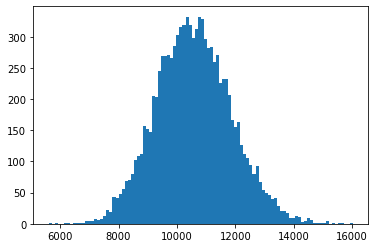

In [7]:
plt.hist(beta2_b, bins=100);

## Parametric Bootstrap for Regression

In [9]:
results = sm.OLS(y,X).fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           2.95e-55
Time:                        19:43:48   Log-Likelihood:                -6213.1
No. Observations:                 546   AIC:                         1.243e+04
Df Residuals:                     543   BIC:                         1.245e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5612.5997   4102.819      1.368      0.1

In [13]:
beta0_hat = results.params[0]
beta1_hat = results.params[1]
beta2_hat = results.params[2]
resids = results.resid

In [16]:
beta0_b2 = np.zeros(B)
beta1_b2 = np.zeros(B)
beta2_b2 = np.zeros(B)

In [17]:
for b in range(B):
    u = np.random.choice(resids, size=n, replace=True)
    y_star = beta0_hat + beta1_hat * x1 + beta2_hat * x2 + u
    results_b = sm.OLS(y_star, X).fit()
    beta0_b2[b] = results_b.params[0]
    beta1_b2[b] = results_b.params[1]
    beta2_b2[b] = results_b.params[2]

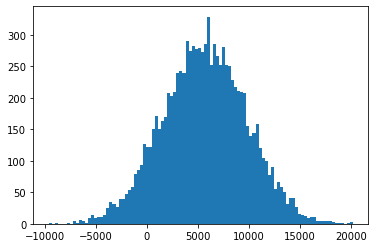

In [18]:
plt.hist(beta0_b2, bins=100);

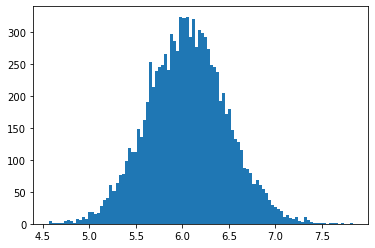

In [19]:
plt.hist(beta1_b2, bins=100);

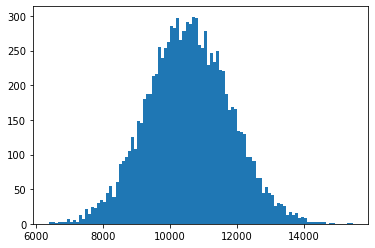

In [20]:
plt.hist(beta2_b2, bins=100);